In [1]:
# Import libraries
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import pandas as pd 
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

In [3]:
# Load the data
df = pd.read_csv('../data/listings.csv')
df.sample(10)

id                                               name  \
7024             39719348   Cozy 1BR Old Town - Steps from Culture & History   
9628             53056356              Double Room in the Heart of Barcelona   
2223              9380878       Vallhonrat · Modern apartment with a terrace   
10154  563553175219651122   Cama en Cabina Superior - Dormitorio de 8 plazas   
2769             13840632       1 habitacion con cama doble para una persona   
12693  839061743166124060    Spacious & Sunny: Bright Apartment with Balcony   
737               1482060                Beautiful apartment by Pl Catalunya   
10514  623667528829180751                              Sunny Playa Apartment   
4674             24520554   Exclusive&Classy flat 2 min from Paseo de Gracia   
10803  650574813481686771  Stunning 4 bedroom/2 bathroom apartment with pool   

         host_id     host_name neighbourhood_group  \
7024   238751669         Jordi        Ciutat Vella   
9628   428355504    Fontanella        Ciutat Vella   
2223     9478280  Simona & Pia      Sants-Montjuïc   
10154   46914366         Mambo      Sants-Montjuïc   
2769    81670000       Maribel              Gràcia   
12693  176514024          Luis            Eixample   
737      6166581          Koni        Ciutat Vella   
10514  370718107     Alexandre          Sant Martí   
4674     4101093      Eli&Agus            Eixample   
10803  406390813          Nick      Sants-Montjuïc   

                               neighbourhood   latitude  longitude  \
7024   Sant Pere, Santa Caterina i la Ribera  41.384099   2.182954   
9628                          el Barri Gòtic  41.387240   2.174230   
2223                            el Poble Sec  41.373010   2.157790   
10154                           el Poble Sec  41.373410   2.165250   
2769               Vallcarca i els Penitents  41.416730   2.136150   
12693         la Nova Esquerra de l'Eixample  41.385221   2.154432   
737    Sant Pere, Santa Caterina i la Ribera  41.388680   2.175080   
10514      el Parc i la Llacuna del Poblenou  41.395550   2.192910   
4674                  la Dreta de l'Eixample  41.397430   2.163870   
10803             la Marina del Prat Vermell  41.352720   2.144210   

             room_type  price  minimum_nights  number_of_reviews last_review  \
7024   Entire home/apt  536.0              31                 29  2024-09-02   
9628      Private room  135.0               1                149  2024-09-02   
2223   Entire home/apt  218.0               1                 32  2023-09-09   
10154      Shared room   50.0               1                257  2024-08-22   
2769      Private room   31.0               1                 25  2024-07-01   
12693     Private room  124.0               1                106  2024-08-20   
737    Entire home/apt  160.0               3                755  2024-08-23   
10514  Entire home/apt  222.0               1                 71  2024-08-23   
4674   Entire home/apt  273.0               4                184  2024-08-18   
10803  Entire home/apt  200.0              31                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
7024                5.80                               6               329   
9628                5.16                               7                18   
2223                0.32                              29               335   
10154               8.30                               8               362   
2769                0.25                               1               249   
12693               5.97                               3               157   
737                 5.64                               4               128   
10514               2.60                              48                53   
4674                2.39                               8                38   
10803                NaN                               6               363   

       number_of_reviews_ltm      li

In [ ]:
# Univariate analysis: numeric
# Questions:
# What are typical listing prices per night?
# What are the minimum number of nights for booking?
# For this data how many listings do hosts have?
# Are there more or less days available for booking?
# What do the units offer in terms of beds and bedrooms?

In [5]:
# View list of numeric columns
numeric_cols = df.select_dtypes(include = ['int64', 'float64'])
numeric_cols.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [7]:
# Filter data to numeric columns to view their distribution (typical values and variabilities)
numeric_cols = df[['price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm']]

In [9]:
# Generate summary statistics
numeric_cols.describe()

price  minimum_nights  number_of_reviews  reviews_per_month  \
count  15422.000000    19482.000000       19482.000000       14731.000000   
mean     168.633575       15.393799          47.606714           1.518737   
std      262.686362       30.786373          99.350461           2.074713   
min        8.000000        1.000000           0.000000           0.010000   
25%       66.000000        1.000000           1.000000           0.230000   
50%      128.000000        3.000000           7.000000           0.870000   
75%      212.000000       31.000000          48.000000           2.270000   
max     9999.000000     1124.000000        2453.000000          74.630000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                    19482.000000      19482.000000           19482.000000  
mean                        41.368237        177.206704              11.905810  
std                         88.454600        125.322884              24.813159  
min                          1.000000          0.000000               0.000000  
25%                          1.000000         59.000000               0.000000  
50%                          6.000000        183.000000               2.000000  
75%                         33.000000        300.000000              16.000000  
max                        437.000000        365.000000            1287.000000

In [11]:
# View percentiles for the first seven columns
numeric_cols.iloc[:,0:7].describe(percentiles = [0.10, 0.25, 0.50, 0.75, 0.90, 1.0])

price  minimum_nights  number_of_reviews  reviews_per_month  \
count  15422.000000    19482.000000       19482.000000       14731.000000   
mean     168.633575       15.393799          47.606714           1.518737   
std      262.686362       30.786373          99.350461           2.074713   
min        8.000000        1.000000           0.000000           0.010000   
10%       39.000000        1.000000           0.000000           0.080000   
25%       66.000000        1.000000           1.000000           0.230000   
50%      128.000000        3.000000           7.000000           0.870000   
75%      212.000000       31.000000          48.000000           2.270000   
90%      303.000000       32.000000         144.000000           3.640000   
100%    9999.000000     1124.000000        2453.000000          74.630000   
max     9999.000000     1124.000000        2453.000000          74.630000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                    19482.000000      19482.000000           19482.000000  
mean                        41.368237        177.206704              11.905810  
std                         88.454600        125.322884              24.813159  
min                          1.000000          0.000000               0.000000  
10%                          1.000000          0.000000               0.000000  
25%                          1.000000         59.000000               0.000000  
50%                          6.000000        183.000000               2.000000  
75%                         33.000000        300.000000              16.000000  
90%                        138.000000        338.000000              39.000000  
100%                       437.000000        365.000000            1287.000000  
max                        437.000000        365.000000            1287.000000

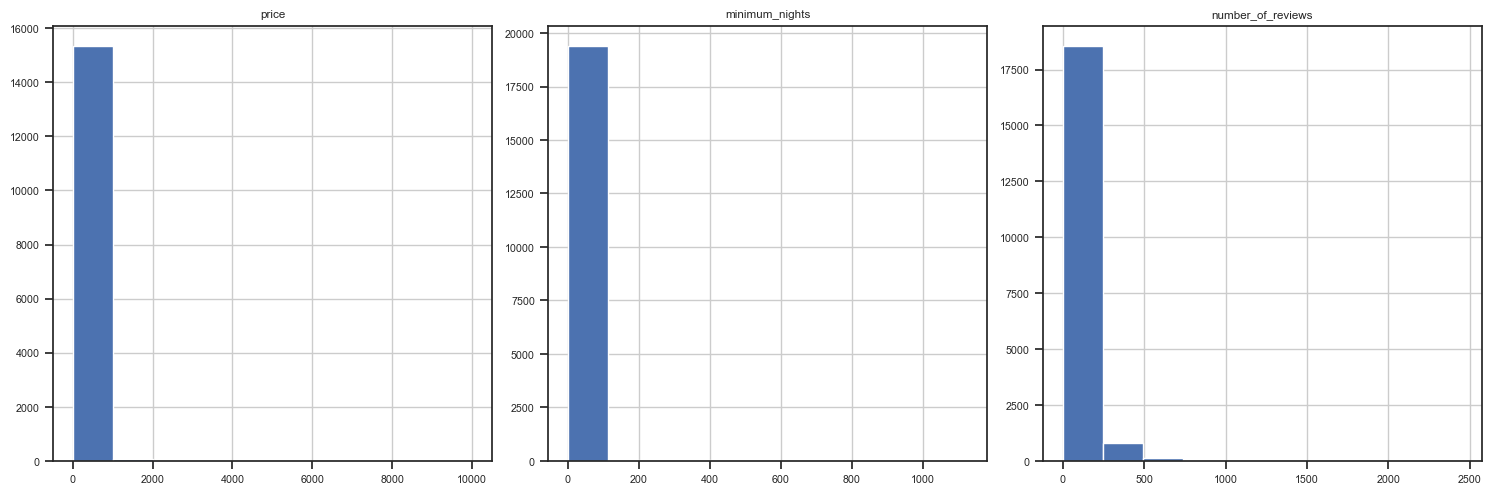

In [55]:
#Histogram for multiple features: "price", "minimum_nights", "number_of_reviews"
numeric_cols[['price', 'minimum_nights', 'number_of_reviews']].hist(
    figsize=(15, 5), layout=(1, 3)
)
plt.tight_layout()
plt.show()

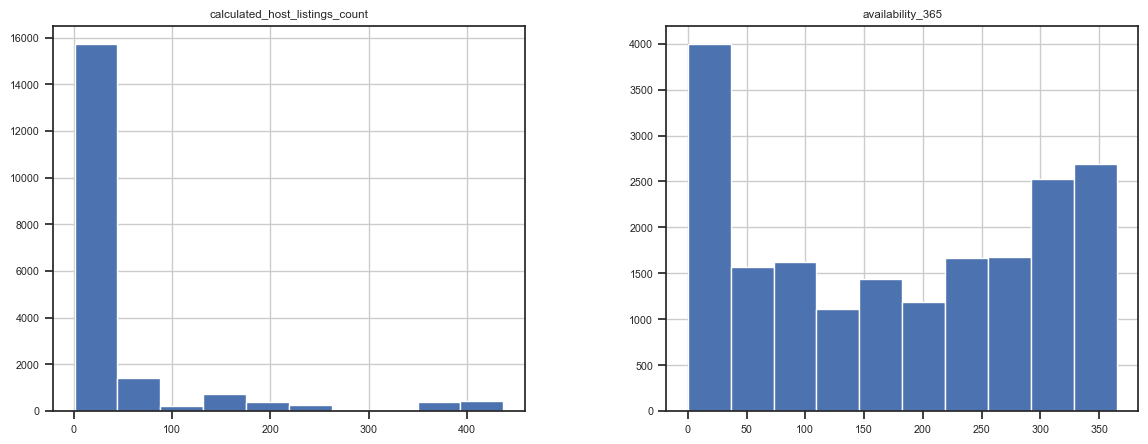

In [61]:
#Histogram for multiple features: "calculated_host_listings_count", "availability_365"
numeric_cols[['calculated_host_listings_count', 'availability_365']].hist(
    figsize=(14, 5)
)
plt.show()

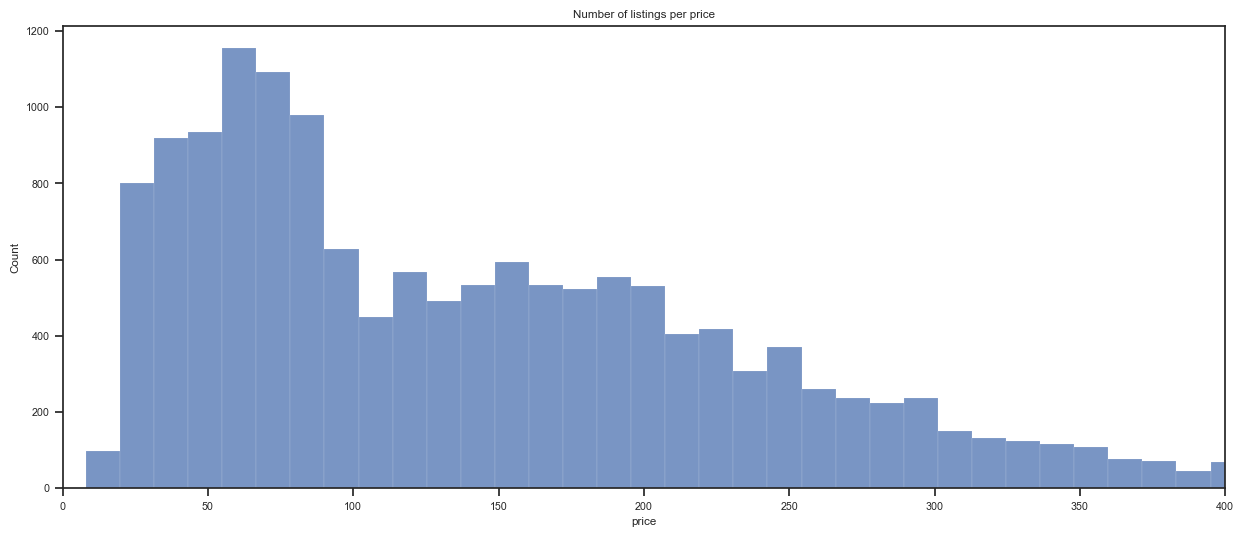

In [65]:
# Distribution of price
plt.figure(figsize=(15, 6))
ax = sns.histplot(df['price'])
ax.set_xlim(0, 400)
ax.set_title('Number of listings per price')
plt.show()

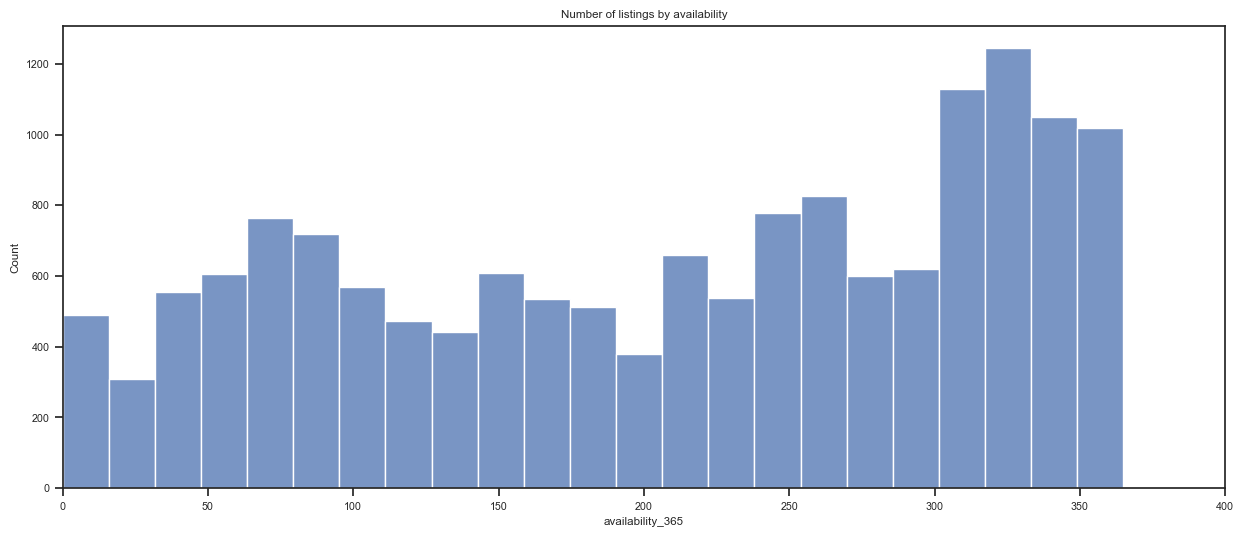

In [67]:
# Distribution of availability
plt.figure(figsize=(15, 6))
ax = sns.histplot(df['availability_365'])
ax.set_xlim(0,400) 
ax.set_title('Number of listings by availability')
plt.show()

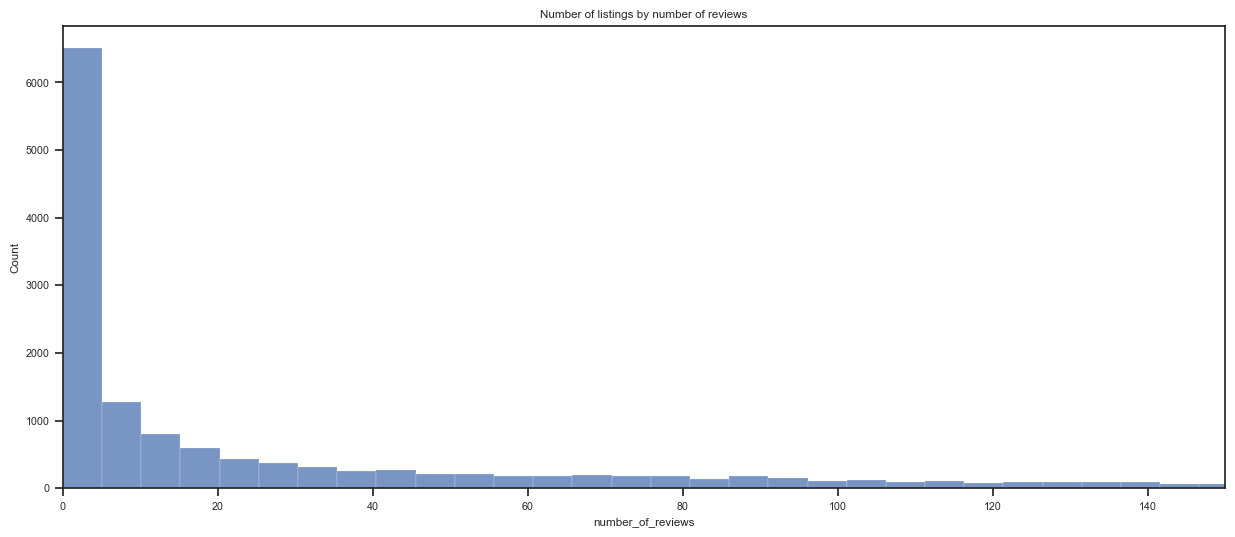

In [69]:
# Distribution of number of reviews
plt.figure(figsize=(15, 6))
ax = sns.histplot(df['number_of_reviews'])
ax.set_xlim(0,150) 
ax.set_title('Number of listings by number of reviews')
plt.show()

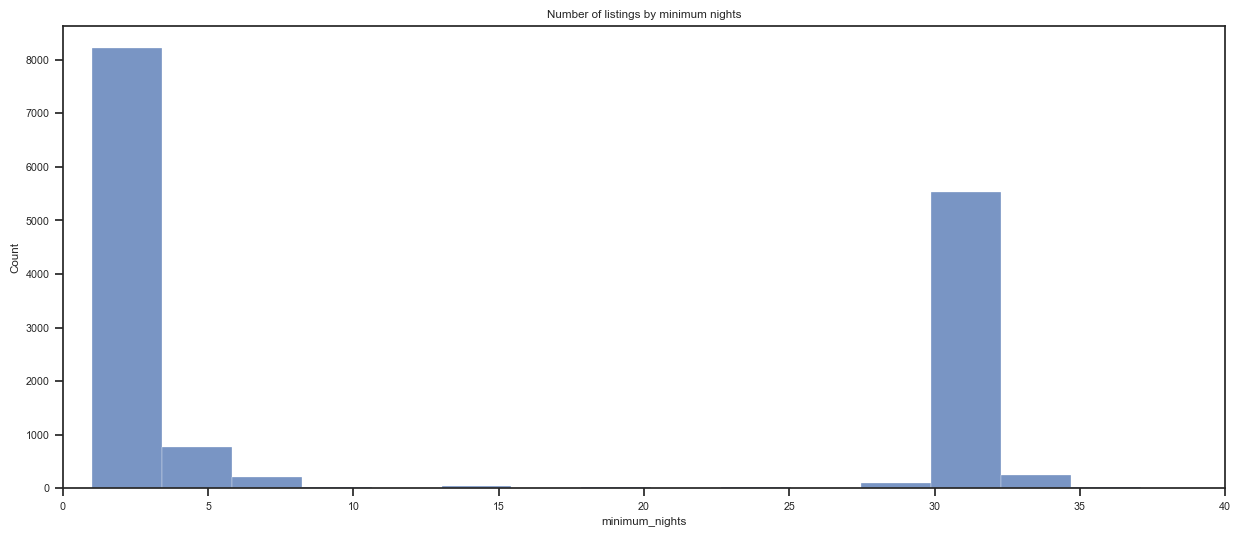

In [71]:
# Distribution of minimum nights
plt.figure(figsize=(15, 6))
ax = sns.histplot(df['minimum_nights'])
ax.set_xlim(0,40) 
ax.set_title('Number of listings by minimum nights')
plt.show()

In [25]:
# Univariate analysis: categorical
# Questions:
# How are hosts ranked? Are there hosts more popular than others?
# How are room types ranked? What rental unit types are the most popular?
# How are neighborhoods ranked? Are there more listings based on the neighborhood?

In [27]:
# View list of categorical columns
cat_cols = df.select_dtypes(include = 'object')
cat_cols.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review', 'license'],
      dtype='object')

In [29]:
# Describe categorical columns "neighbourhood" and "room_type"
df[['neighbourhood', 'room_type']].describe()

neighbourhood        room_type
count                    19482            19482
unique                      71                4
top     la Dreta de l'Eixample  Entire home/apt
freq                      2359            11589

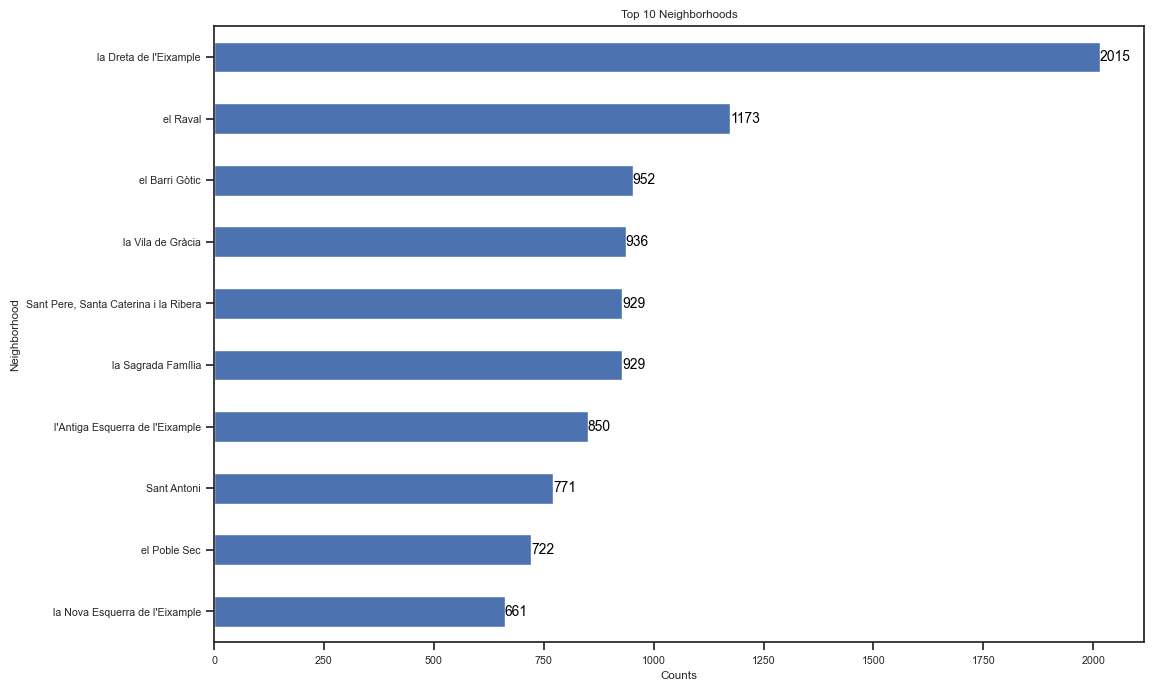

In [77]:
# Barplot of showing top 10 neighborhoods
top_neighbourhoods = df['neighbourhood'].value_counts().head(10)  # Get the top 10 neighborhoods

ax = top_neighbourhoods.sort_values(ascending=True).plot(
    kind='barh', 
    title='Top 10 Neighborhoods', 
    figsize=(12, 8)
)

# Set the x-axis and y-axis labels
ax.set_xlabel('Counts')
ax.set_ylabel('Neighborhood')

# Add bar labels at the end of the bars
for p in ax.patches:
    # Position the label at the end of each bar
    ax.text(
        p.get_width() + 0.5,  # Position the label just outside the bar
        p.get_y() + p.get_height() / 2,  # Vertically center the label within the bar
        f'{int(p.get_width())}',  # Display the count as an integer
        ha='left',  # Horizontally align the text to the left of the label
        va='center',  # Vertically center the label
        fontsize=10,  # Font size of the label
        color='black'  # Color of the label text
    )

# Remove gridlines
ax.grid(False)

# Show the plot
plt.show()

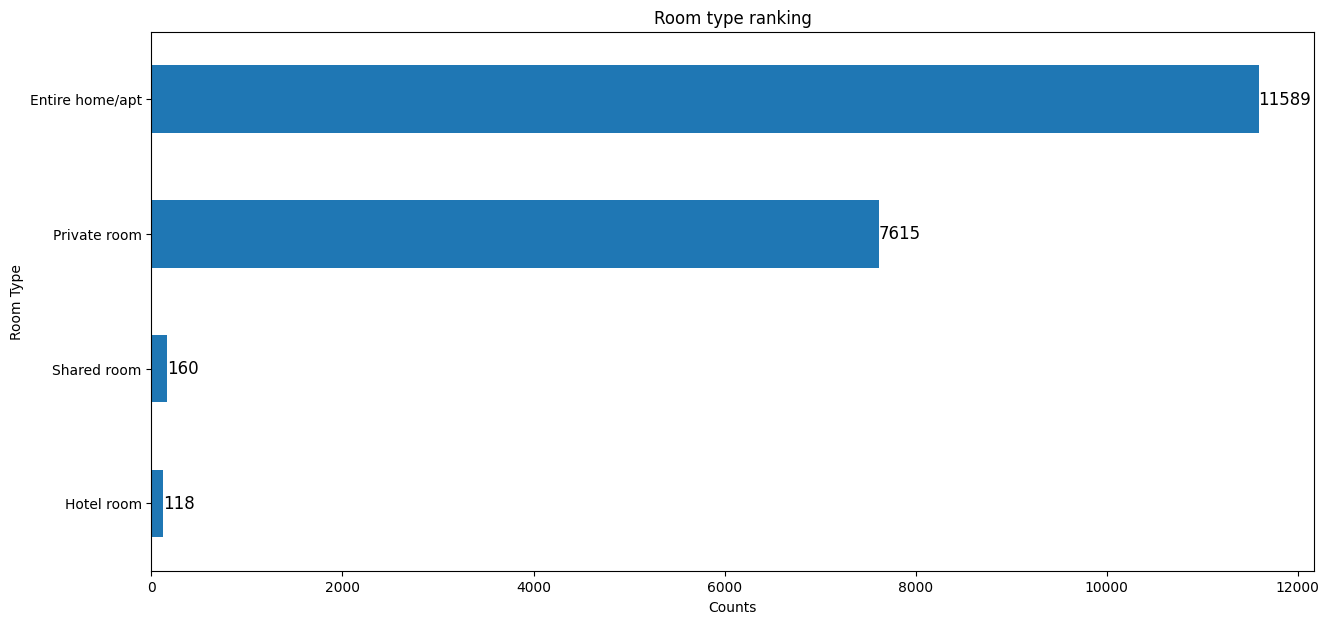

In [33]:
# Barplot of showing room type popularity or ranking or frequency
ax = df['room_type'].value_counts().sort_values(ascending=True).plot(
    kind='barh', 
    title='Room type ranking', 
    figsize=(15, 7)
)

# Set the x-axis label
ax.set_xlabel('Counts')
ax.set_ylabel('Room Type')

# Add bar labels at the end of the bars
for p in ax.patches:
    # Position the label at the end of each bar
    ax.text(
        p.get_width() + 0.5,  # Position the label just outside the bar
        p.get_y() + p.get_height() / 2,  # Vertically center the label within the bar
        f'{int(p.get_width())}',  # Display the count as an integer
        ha='left',  # Horizontally align the text to the left of the label
        va='center',  # Vertically center the label
        fontsize=12,  # Font size of the label
        color='black'  # Color of the label text
    )

# Remove gridlines
ax.grid(False)

# Show the plot
plt.show()

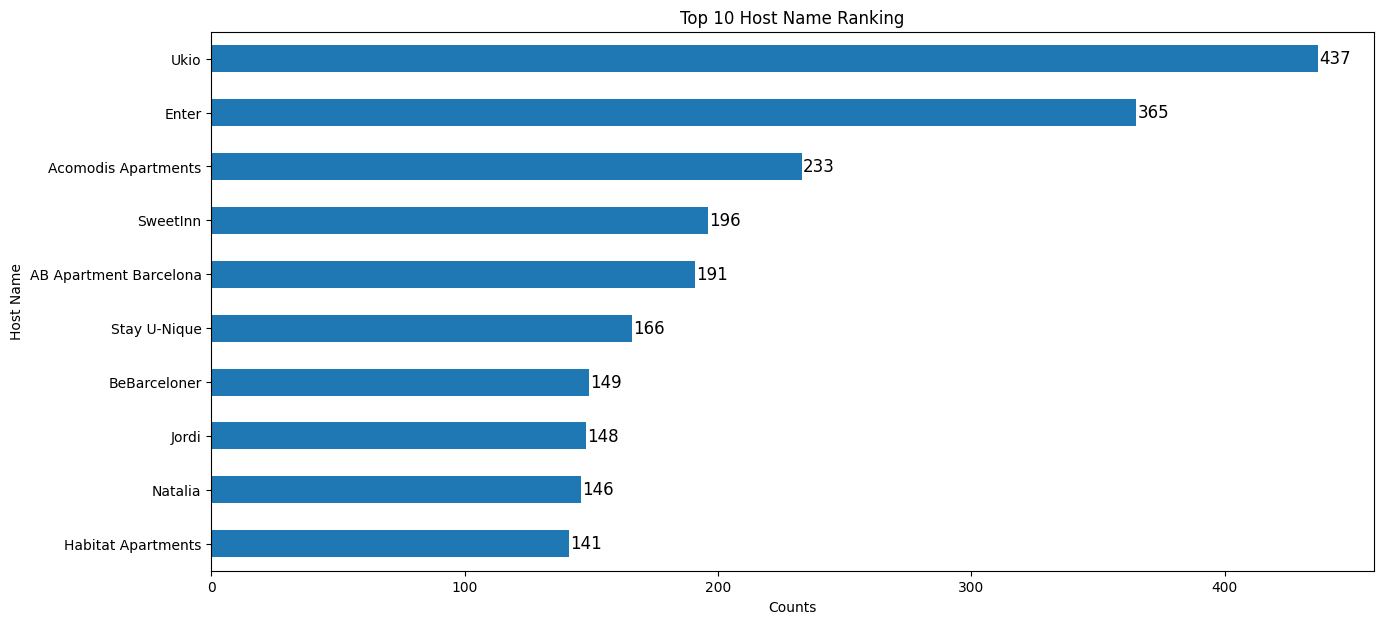

In [35]:
# Barplot showing top 10 host names based on popularity or frequency
top_10_hosts = df['host_name'].value_counts().head(10)  # Get the top 10 host names
ax = top_10_hosts.sort_values(ascending=True).plot(  # Sort for horizontal bar chart
    kind='barh',
    title='Top 10 Host Name Ranking',
    figsize=(15, 7)
)

# Set the x-axis label
ax.set_xlabel('Counts')
ax.set_ylabel('Host Name')

# Add bar labels at the end of the bars
for p in ax.patches:
    # Position the label at the end of each bar
    ax.text(
        p.get_width() + 0.5,  # Position the label just outside the bar
        p.get_y() + p.get_height() / 2,  # Vertically center the label within the bar
        f'{int(p.get_width())}',  # Display the count as an integer
        ha='left',  # Horizontally align the text to the left of the label
        va='center',  # Vertically center the label
        fontsize=12,  # Font size of the label
        color='black'  # Color of the label text
    )

# Remove gridlines
ax.grid(False)

# Show the plot
plt.show()

In [37]:
# Multivariate analysis: Number to Number
# Questions:
# Is the listing price related to the number of listings the host have?
# Are the number of reviews related to the listing price or number of bathrooms?

In [39]:
# Determine if there is a linear relationship between numeric features
print('Correlations:')
numeric_cols.corr()

Correlations:


price  minimum_nights  number_of_reviews  \
price                           1.000000       -0.179169           0.068275   
minimum_nights                 -0.179169        1.000000          -0.148205   
number_of_reviews               0.068275       -0.148205           1.000000   
reviews_per_month               0.039923       -0.193456           0.572551   
calculated_host_listings_count  0.037712        0.084007          -0.132920   
availability_365                0.043742        0.045043           0.047736   
number_of_reviews_ltm           0.058336       -0.171906           0.743555   

                                reviews_per_month  \
price                                    0.039923   
minimum_nights                          -0.193456   
number_of_reviews                        0.572551   
reviews_per_month                        1.000000   
calculated_host_listings_count          -0.102745   
availability_365                         0.045058   
number_of_reviews_ltm                    0.830236   

                                calculated_host_listings_count  \
price                                                 0.037712   
minimum_nights                                        0.084007   
number_of_reviews                                    -0.132920   
reviews_per_month                                    -0.102745   
calculated_host_listings_count                        1.000000   
availability_365                                      0.177001   
number_of_reviews_ltm                                -0.111865   

                                availability_365  number_of_reviews_ltm  
price                                   0.043742               0.058336  
minimum_nights                          0.045043              -0.171906  
number_of_reviews                       0.047736               0.743555  
reviews_per_month                       0.045058               0.830236  
calculated_host_listings_count          0.177001              -0.111865  
availability_365                        1.000000               0.056903  
number_of_reviews_ltm                   0.056903               1.000000

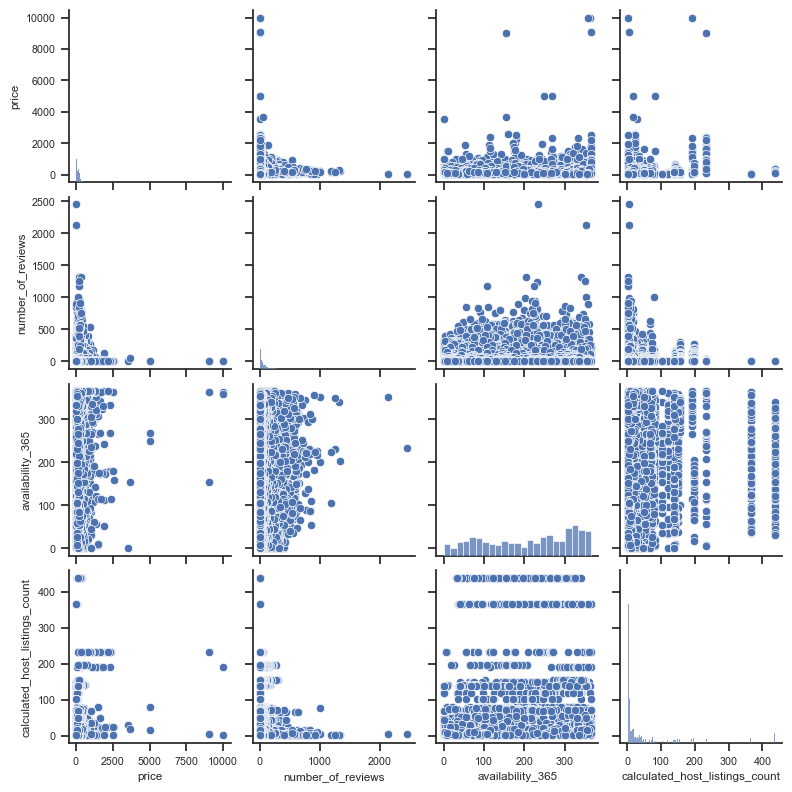

In [85]:
# Create scattermatrix view of feature relationship
columns_to_plot = ['price', 'number_of_reviews', 'availability_365', 'calculated_host_listings_count']
sns.set_theme(style='ticks', font_scale=0.7)
sns.pairplot(df[columns_to_plot], height=2)
plt.show()

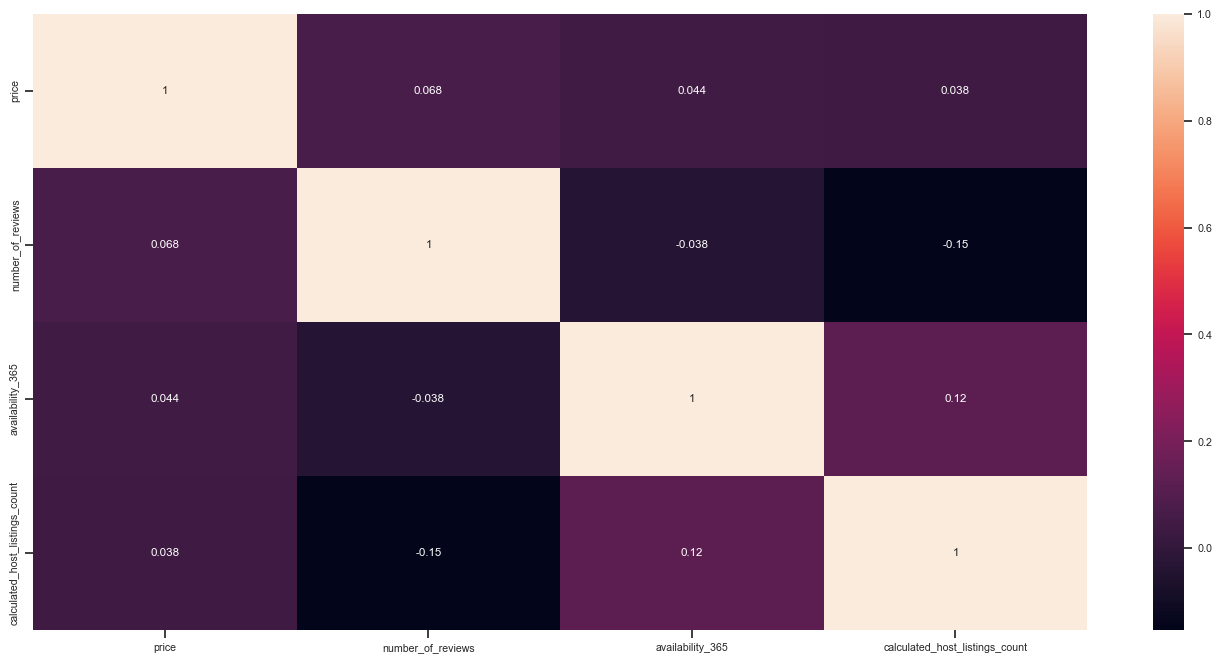

In [89]:
# Create heatmap showing correlation for numeric columns
plt.figure(figsize = (17, 8))
sns.heatmap(df[['price', 'number_of_reviews', 'availability_365', 'calculated_host_listings_count']].corr(), annot = True)
plt.show()

In [45]:
# Multivariate analysis: Categorical to Number
# Questions:
# Is host ranking related to the number of listings?
# Are higher ratings associated with property location? Which neighborhoods cost more or less?
# Is the listing price related to the room type?
# Are certain room types more or less prevalent based on location?
# Are listings with fewer or more booking availability more or less expensive to book?

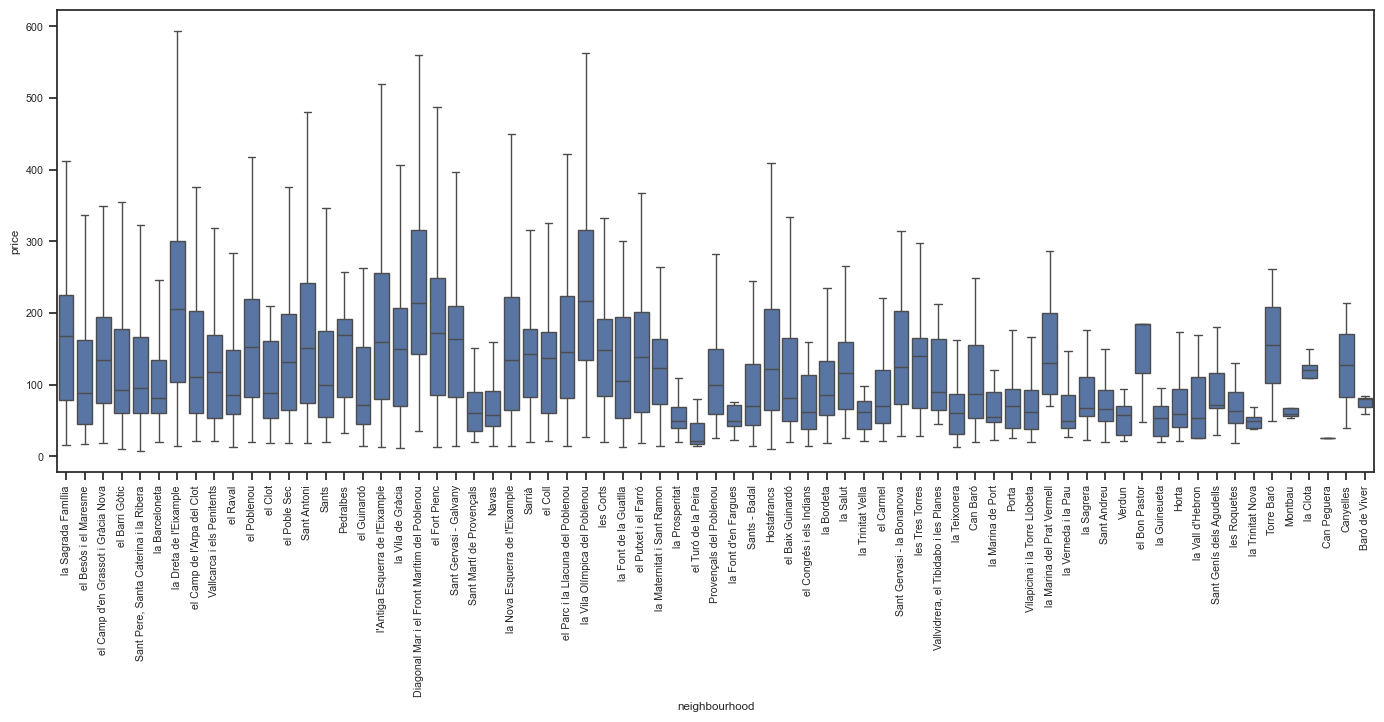

In [47]:
# Boxplot comparing neighborhood with price
plt.figure(figsize=(17, 6))
sns.boxplot(x = df['neighbourhood'], y = df['price'], showfliers = False)
plt.xticks(rotation = 90)
plt.show()

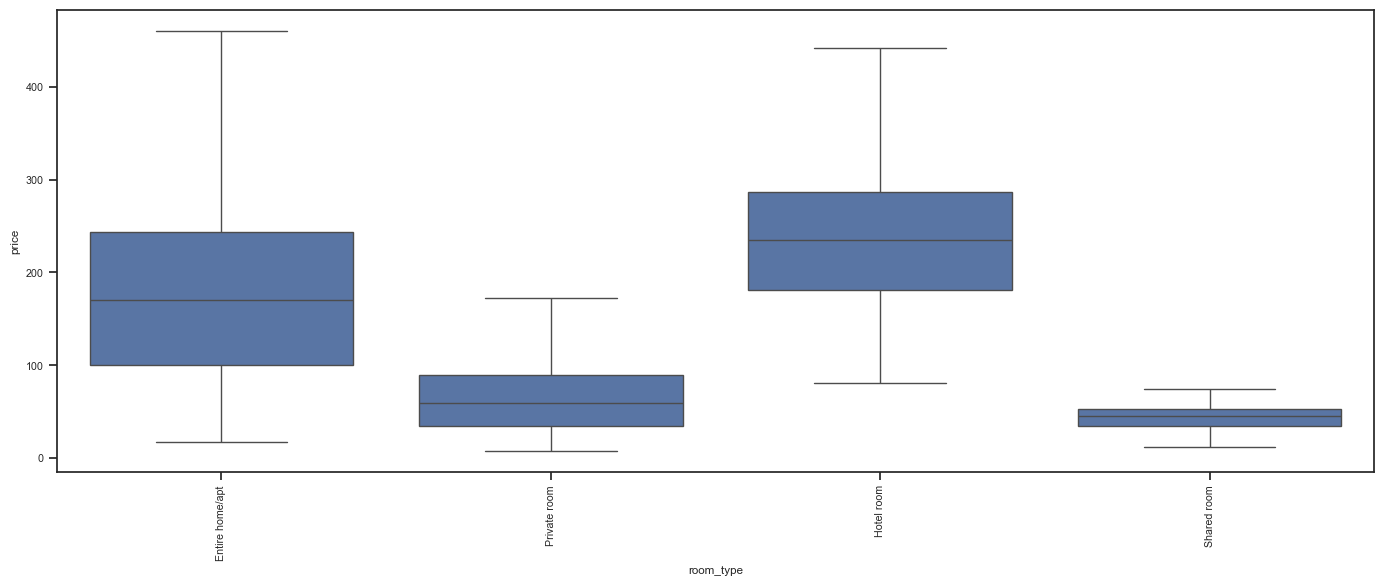

In [49]:
# Boxplot comparing room type with price
plt.figure(figsize=(17, 6))
sns.boxplot(x = df['room_type'], y = df['price'], showfliers = False)
plt.xticks(rotation = 90)
plt.show()

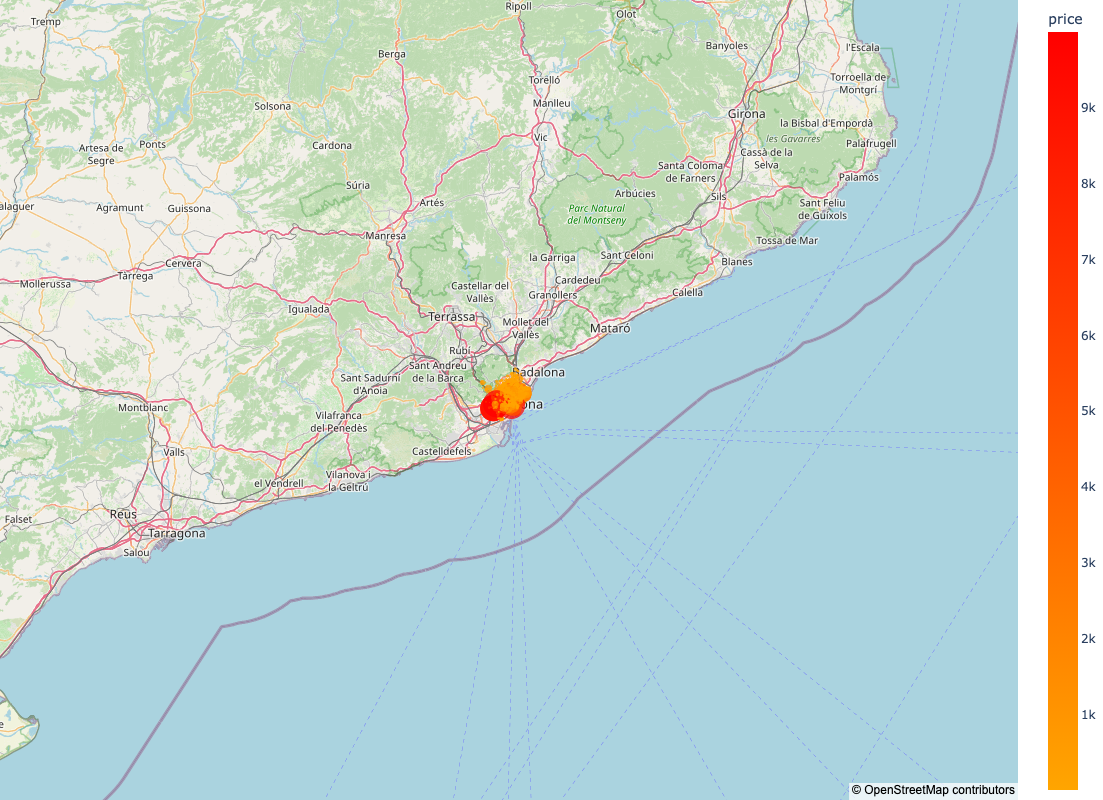

In [51]:
# Clean the DataFrame
df = df.dropna(subset=['price', 'latitude', 'longitude'])  # Remove rows with NaN in essential columns
df = df[df['price'] > 0]  # Ensure all prices are positive

# Define the color scale
color_scale = [(0, 'orange'), (1, 'red')]

# Create the scatter mapbox
fig = px.scatter_mapbox(
    df,
    lat='latitude',
    lon='longitude',
    hover_name='neighbourhood',
    hover_data=['neighbourhood', 'availability_365'],
    color='price',
    color_continuous_scale=color_scale,
    size='price',
    zoom=8,
    height=800,
    width=1100
)

# Update the layout
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={'r': 0, 't': 0, 'l': 0, 'b': 0})

# Show the figure
fig.show()